In [1]:
import json
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, classification_report

# Load the data from the JSON file
with open('peliculas_comedia.json', 'r') as f:
    comedia = json.load(f)
with open('peliculas_terror.json', 'r') as f:
    terror = json.load(f)
#with open('films_data.json', 'r') as f:
    #accion = json.load(f)
# Convert the data to a DataFrame
df = pd.DataFrame(comedia + terror)
#df.drop(['title'], axis=1, inplace=True)

#df2 = pd.DataFrame(accion)
# Filter the data to include only comedies and horrors
df
df['sinopsis'] = df['sinopsis'].apply(lambda x: ' '.join(x))
relevant_genres = ['Comedia', 'Terror'] 
df['genre'] = df['genre'].apply(lambda x: [genre for genre in x if genre in relevant_genres])
df['genre'] = df['genre'].str[0].astype(str)
df.drop(['title'],axis=1)
 




,genre,sinopsis
0,Comedia,"Secuela de ZootrÃ³polis (2016), anunciada en f..."
1,Comedia,"Quinta entrega numerada de la saga Toy Story, ..."
2,Comedia,"Película animada de las tiras cómicas de ""Garf..."
3,Comedia,"Secuela de 'Del revés (Inside Out)' (2015), pr..."
4,Comedia,Tres adolescentes atraen la indignación públic...
...,...,...
995,Terror,Alan llega a la escuela primaria de un pequeño...
996,Terror,Mientras están de vacaciones en una isla parad...
997,Terror,Historia del viaje por carretera de un ‘preppe...
998,Terror,Cuestiona la línea invisible entre víctima y e...


In [2]:
df['genre'].value_counts(normalize=True)

Comedia    0.536
Terror     0.464
Name: genre, dtype: float64

In [3]:
sinopsis = df["sinopsis"]
genre = df["genre"]
sinopsis_train, sinopsis_test, genre_train, genre_test = train_test_split(
    sinopsis, genre, test_size=0.1, random_state=30)


In [4]:
vectorizador = CountVectorizer(stop_words="english")
sinopsis_train_vector = vectorizador.fit_transform(sinopsis_train)
sinopsis_test_vector = vectorizador.transform(sinopsis_test)


In [5]:
clf = LogisticRegression()
clf.fit(sinopsis_train_vector, genre_train)


LogisticRegression()

In [6]:
preds = clf.predict(sinopsis_test_vector)
print(classification_report(genre_test, preds,
      target_names=['Comedia', 'Horror']))


              precision    recall  f1-score   support

     Comedia       0.78      0.76      0.77        50
      Horror       0.76      0.78      0.77        50

    accuracy                           0.77       100
   macro avg       0.77      0.77      0.77       100
weighted avg       0.77      0.77      0.77       100



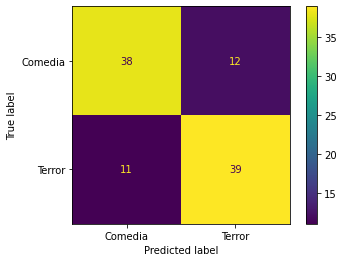

In [7]:
plot_confusion_matrix(clf, sinopsis_test_vector, genre_test)


In [8]:
# dump el clasificador
import pickle
with open('classifier.pkl', 'wb') as f:
    pickle.dump(clf, f)
